In [ ]:
# @author@ShubhamTewari
import rasterio 
from rasterio import plot
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline
#LC08_L2SP_143043_20210412_20210416_02_T1_SR_B4
#LC08_L2SP_143043_20210412_20210416_02_T1_SR_B5

In [ ]:
band4=rasterio.open('LC08_L2SP_143043_20210412_20210416_02_T1_SR_B4.TIF')
band5=rasterio.open('LC08_L2SP_143043_20210412_20210416_02_T1_SR_B5.TIF')

In [ ]:
band4=rasterio.open('LC08_L2SP_143043_20210412_20210416_02_T1_SR_B4.TIF')

In [ ]:
band4.height
band4.width

7601

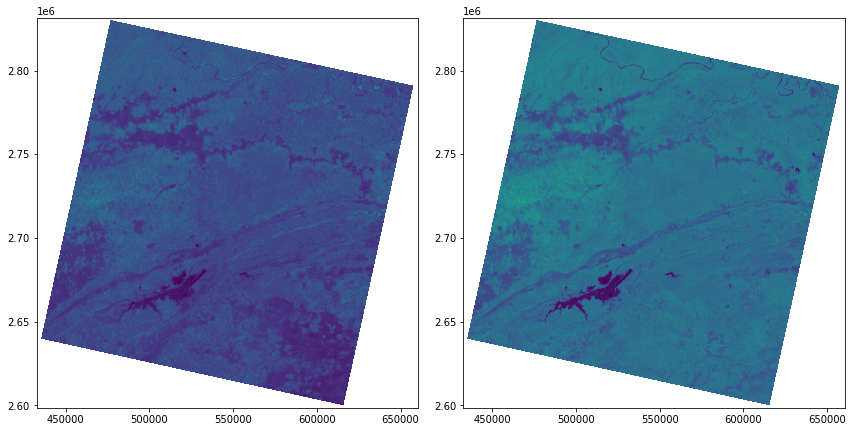

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,12))
plot.show(band4,ax=ax1)
plot.show(band5,ax=ax2)
fig.tight_layout()


In [ ]:
rescaleFactorMult = 0.0003342   #Red band rescaling factor
rescaleFactorAdd = 0.1          #bias value min spectral
#Digital Number to ToA Radiance Values
print('Calculating ToA spectral radiance values (converting digital number to radiance) for RED')
bannd4 = (rescaleFactorMult * band4) + rescaleFactorAdd
rescaleFactorMult = 0.0005241   #Nir band rescaling factor
rescaleFactorAdd = 0.1          #bias value min spectral
#Digital Number to ToA Radiance Values
print('Calculating ToA spectral radiance values (converting digital number to radiance)for NIR ')
bannd5= (rescaleFactorMult * band5) + rescaleFactorAdd

Calculating ToA spectral radiance values (converting digital number to radiance) for RED
Calculating ToA spectral radiance values (converting digital number to radiance) for NIR


In [ ]:
band4.transform
band5.transform

In [ ]:
red=band4.read(1).astype('float64')
nir=band5.read(1).astype('float64')
print(nir)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
ndvi=np.where((nir+red)==0.,0,(nir-red)/(nir+red))
'''
count=0

for i in range(0,band4.height):
  for j in range(0,band4.width):
    if(ndvi[i][j]!=0):
      count=count+1
     
print(count)
'''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


'\ncount=0\n\nfor i in range(0,band4.height):\n  for j in range(0,band4.width):\n    if(ndvi[i][j]!=0):\n      count=count+1\n     \nprint(count)\n'

In [ ]:
ndviImage= rasterio.open('ndviImage.tiff','w',drivers='Gtiff',width=band4.width,height=band4.height,
                        count=1,crs=band4.crs,transform=band4.transform,
                        dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()

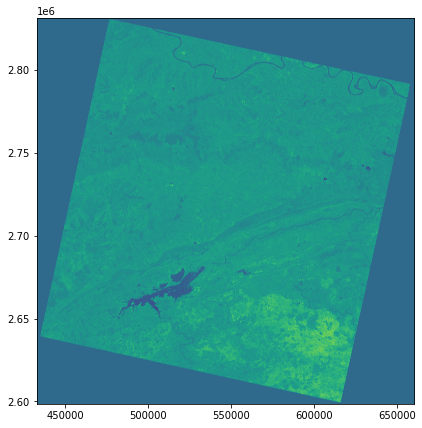

In [ ]:
ndvi=rasterio.open('ndviImage.tiff')

fig,(ax1)=plt.subplots(1,figsize=(6,12))
plot.show(ndvi,ax=ax1)

fig.tight_layout()



In [ ]:
print(ndvi)

<open DatasetReader name='ndviImage.tiff' mode='r'>


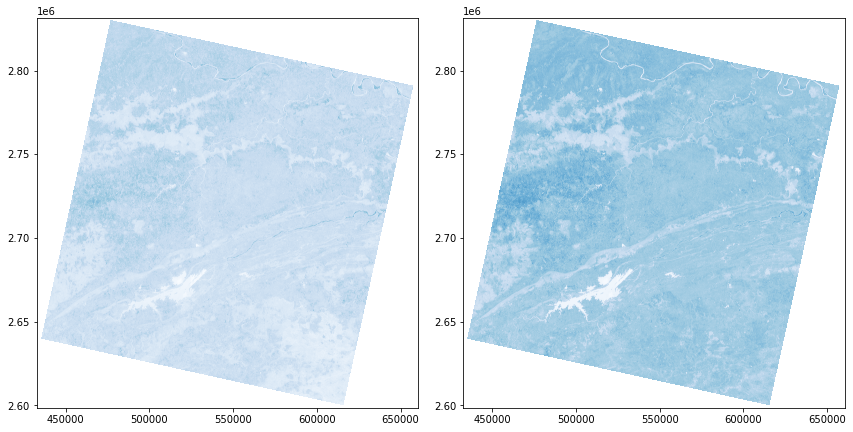

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
plot.show(band4,ax=ax1,cmap='Blues')
plot.show(band5,ax=ax2,cmap='Blues')
fig.tight_layout()

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 7601, 'height': 7761, 'count': 2, 'crs': CRS.from_epsg(32644), 'transform': Affine(30.0, 0.0, 432585.0,
       0.0, -30.0, 2831415.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


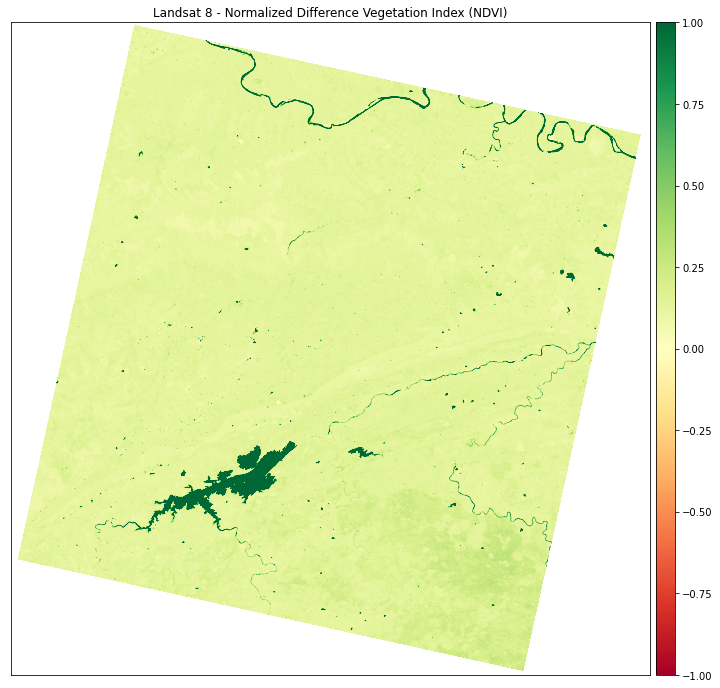

In [ ]:
import os
from glob import glob
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
landsat_path = glob("LC08_L2SP_143043_20210412_20210416_02_T1_SR_B*.TIF")
#LC08_L2SP_143043_20210412_20210416_02_T1_SR_B4
#LC08_L2SP_143043_20210412_20210416_02_T1_SR_B5
landsat_path.sort()
arr_st, meta = es.stack(landsat_path, nodata=-9999)
print(meta)

ndvi1 = es.normalized_diff(arr_st[1], arr_st[0])
titles = ["Landsat 8 - Normalized Difference Vegetation Index (NDVI)"]

# Turn off bytescale scaling due to float values for NDVI
ep.plot_bands(ndvi1, cmap="RdYlGn", cols=1, title=titles, vmin=-1, vmax=1)

In [ ]:
ndvi_class_bins = [-np.inf, 0, 0.1, 0.25, 0.4, np.inf]
#ndvi_class_bins = [-1, 0, 0.1, 0.25, 0.4, 1]
ndvi_landsat_class = np.digitize(ndvi1, ndvi_class_bins)
print(ndvi_landsat_class)
# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
)
np.unique(ndvi_landsat_class)
print(len(ndvi_landsat_class))

[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
7761


4


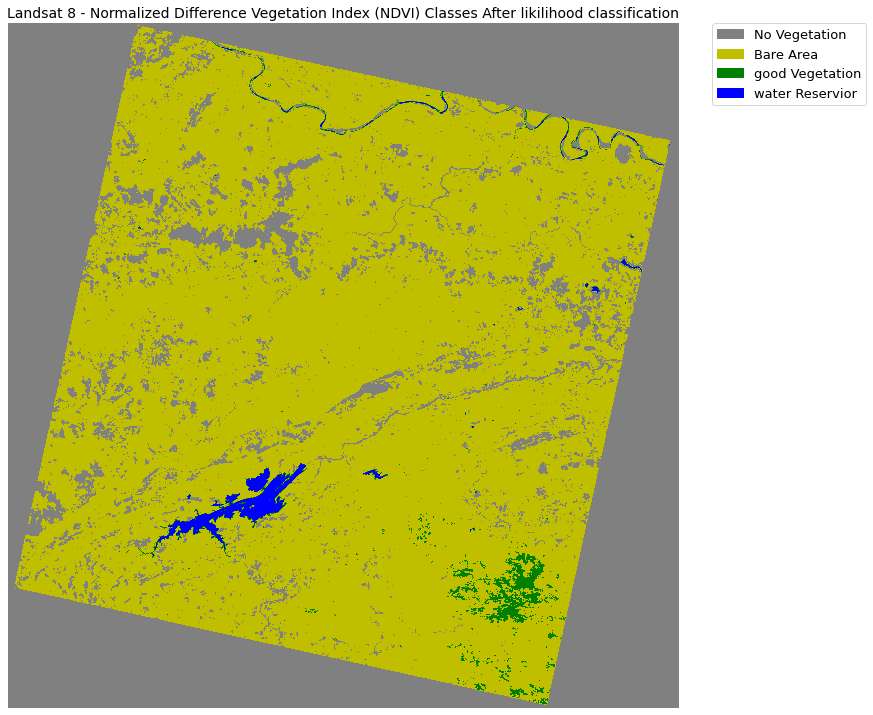

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np
nbr_colors = ["gray", "y","green","blue"]
nbr_cmap = ListedColormap(nbr_colors)
 
# Define class names
ndvi_cat_names = [
    "No Vegetation",
    "Bare Area",
    "good Vegetation",
    "water Reservior",
]
 
# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:4]
print(len(classes))
# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)
 
ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes After likilihood classification",
    fontsize=14,
)
ax.set_axis_off()
 
# Auto adjust subplot to fit figure size
plt.tight_layout()

In [ ]:
len(classes)

4

In [ ]:
len(ndvi_cat_names)

4